=== ORDERS DATASET ===

Missing values in orders dataset:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Data types in orders dataset:
order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

Basic statistics for orders dataset:
            order_purchase_timestamp              order_approved_at  \
count                          99441                          99281   
mean   2017-12-3

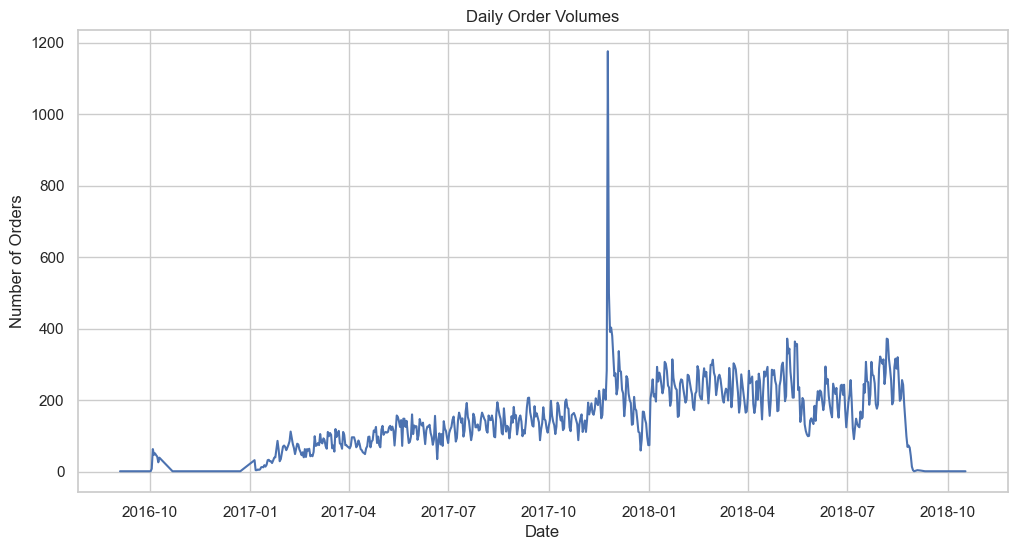

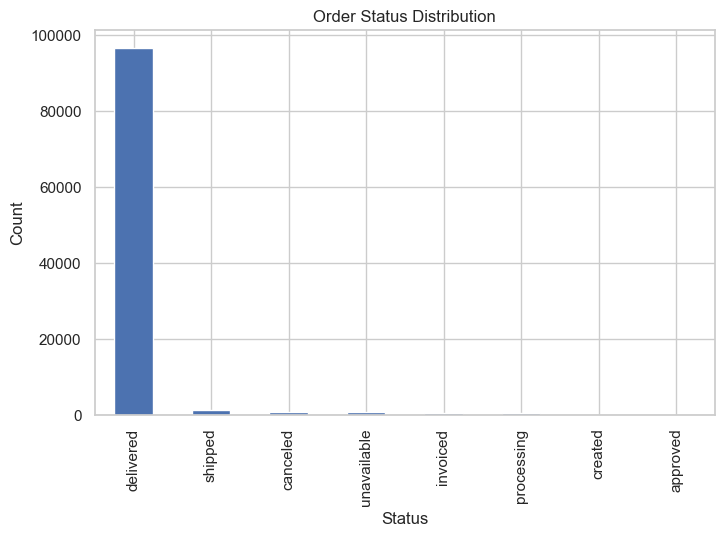


=== PRODUCTS DATASET ===

Missing values in products dataset:
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Data types in products dataset:
product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

Basic statistics for products dataset:
       product_name_lenght  product_description_lenght  product_photos_qty  \
count         32341.000000                32341.000000        32341.000000   
mean             48.476949       

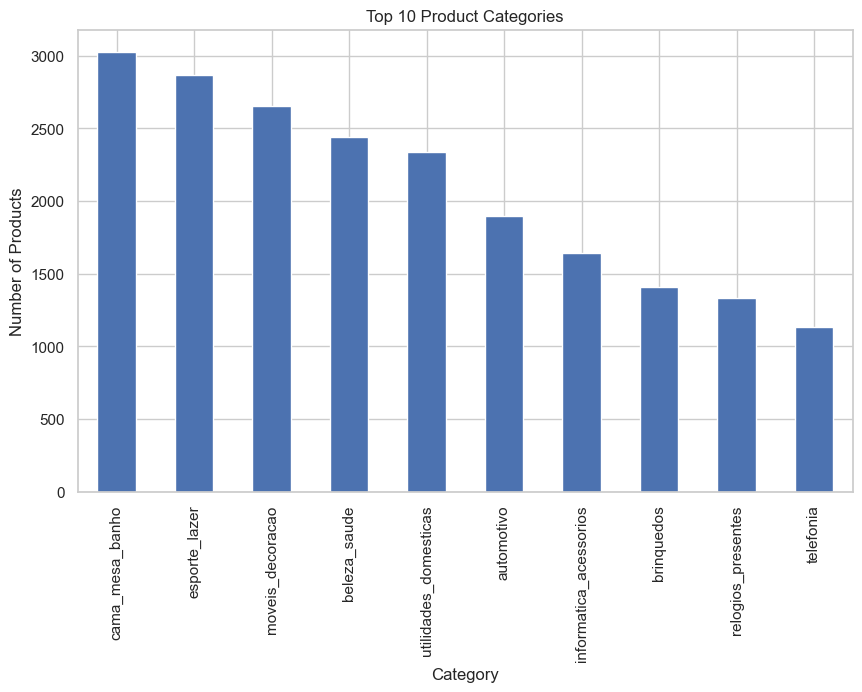

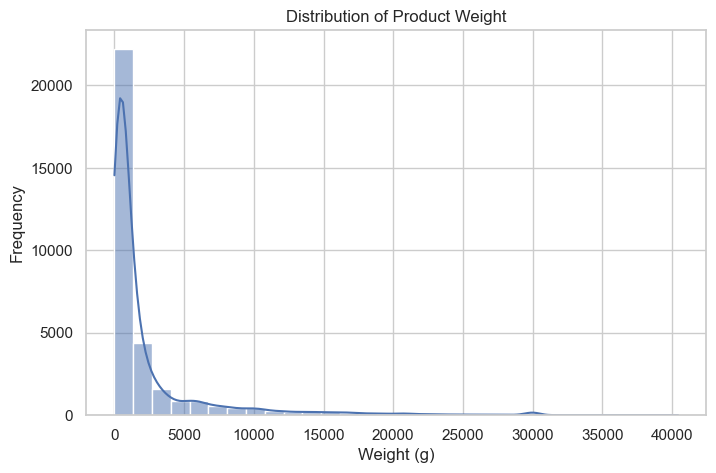


=== SELLERS DATASET ===

Missing values in sellers dataset:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Data types in sellers dataset:
seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object

Number of unique sellers: 3095


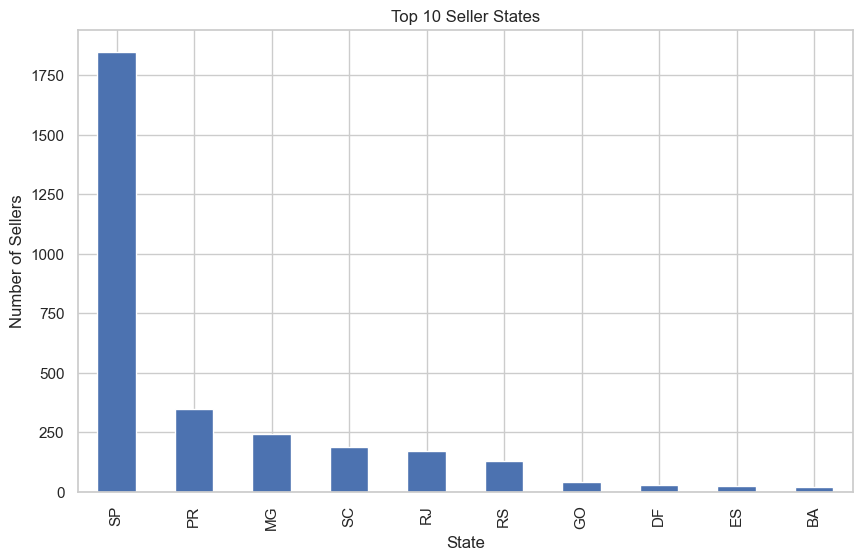


=== CUSTOMERS DATASET ===

Missing values in customers dataset:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Data types in customers dataset:
customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

Number of unique customers: 96096


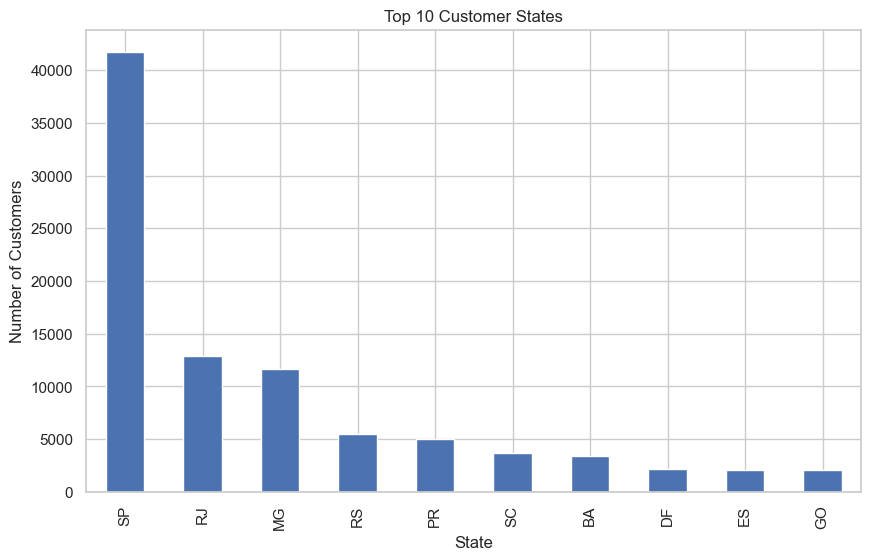


=== ORDER ITEMS DATASET ===

Missing values in order_items dataset:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Data types in order_items dataset:
order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

Basic statistics for order_items dataset:
       order_item_id          price  freight_value
count  112650.000000  112650.000000  112650.000000
mean        1.197834     120.653739      19.990320
std         0.705124     183.633928      15.806405
min         1.000000       0.850000       0.000000
25%         1.000000      39.900000      13.080000
50%         1.000000      74.990000      16.260000
75%         1.000000     134.900000      21.150000
max        21.000000    6

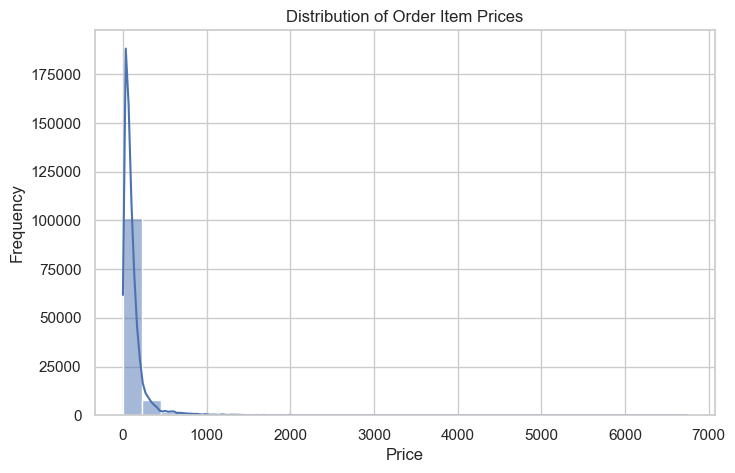


=== ORDER PAYMENTS DATASET ===

Missing values in order_payments dataset:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Data types in order_payments dataset:
order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

Unique payment types: ['credit_card' 'boleto' 'voucher' 'debit_card' 'not_defined']


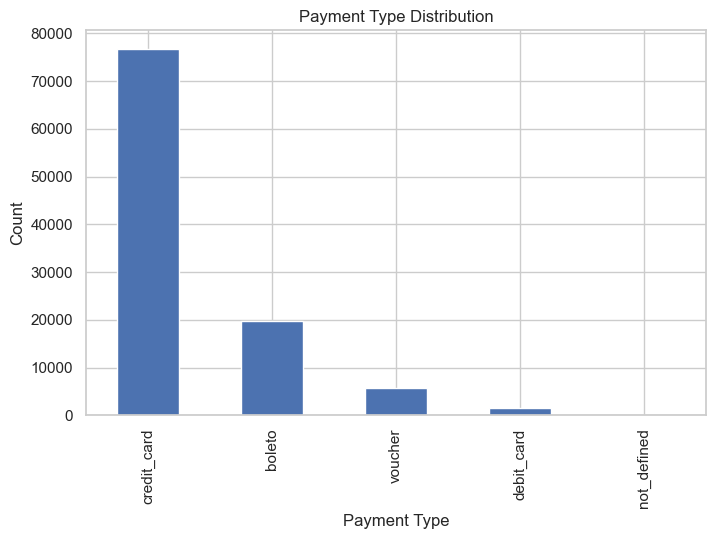

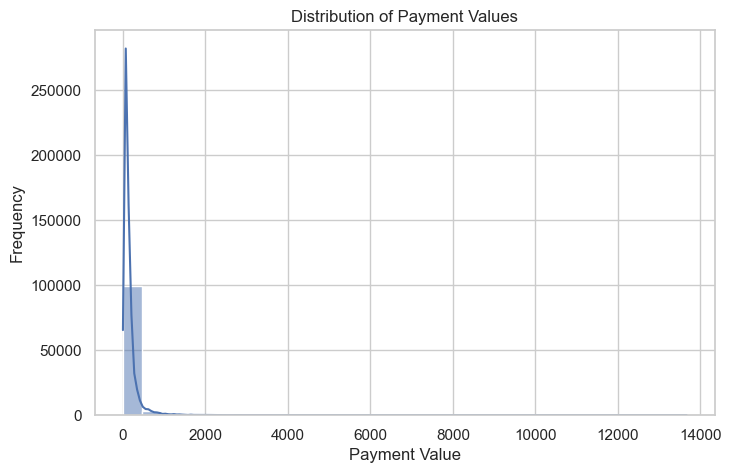


=== ORDER REVIEWS DATASET ===

Missing values in order_reviews dataset:
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Data types in order_reviews dataset:
review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object


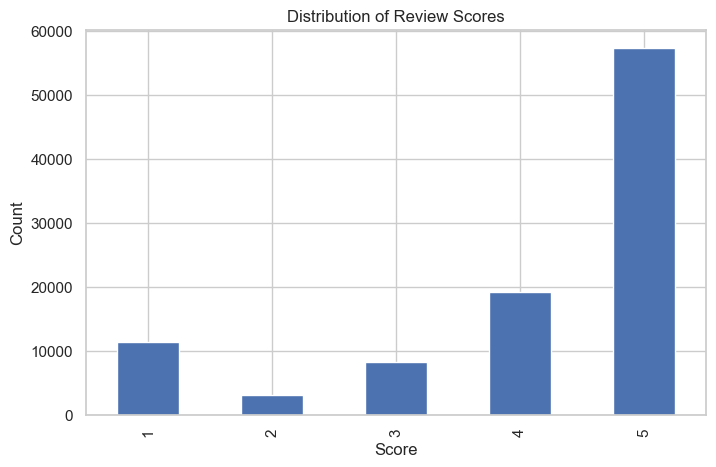


=== GEOLOCATION DATASET ===

Missing values in geolocation dataset:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Data types in geolocation dataset:
geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object


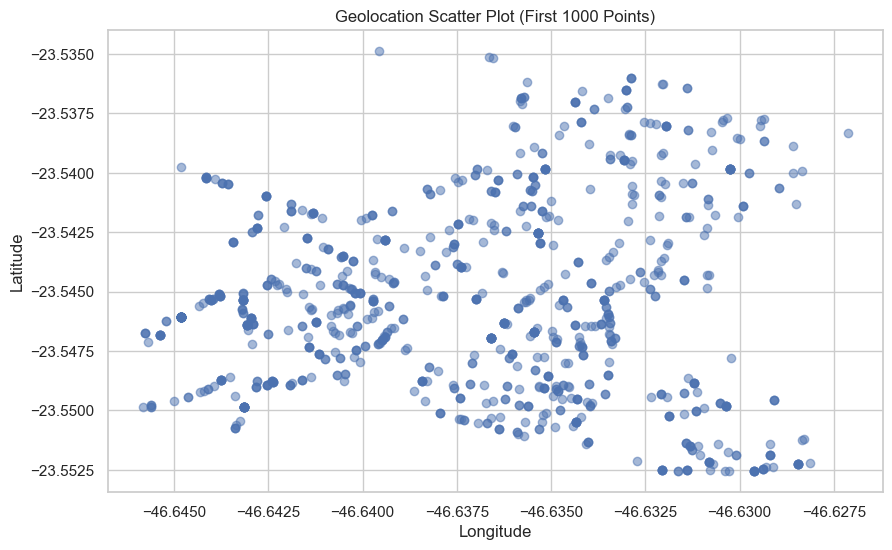

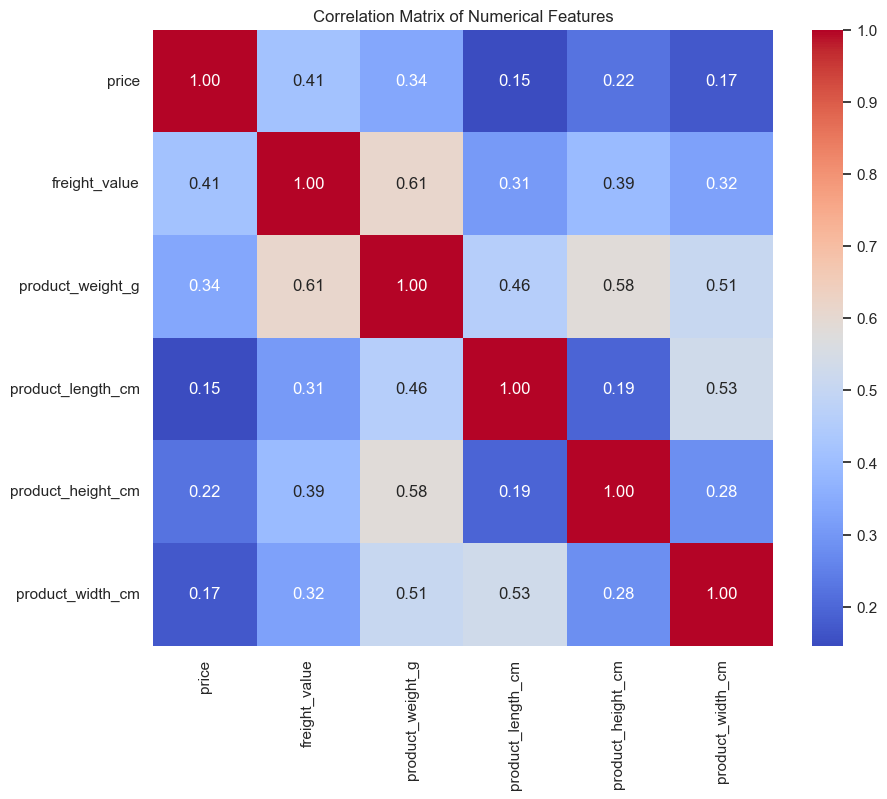

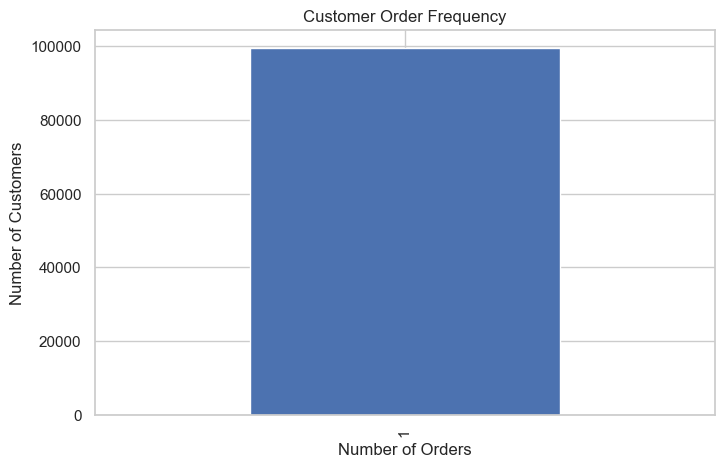

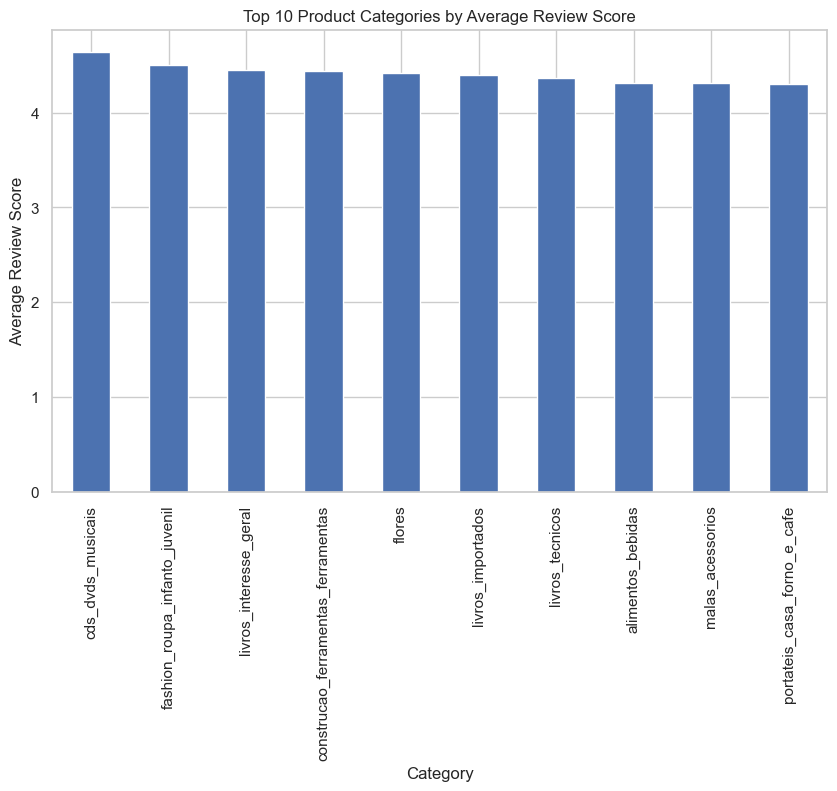

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set plot style for better visualization
sns.set(style="whitegrid")

# Load all datasets
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
product_category_translation = pd.read_csv('product_category_name_translation.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_payments = pd.read_csv('olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
customers = pd.read_csv('olist_customers_dataset.csv')

# Convert date columns to datetime format in orders dataset
date_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
                'order_delivered_customer_date', 'order_estimated_delivery_date']
for col in date_columns:
    orders[col] = pd.to_datetime(orders[col], errors='coerce')

# --- ORDERS DATASET ---
print("=== ORDERS DATASET ===")
# Check for missing values
print("\nMissing values in orders dataset:")
print(orders.isnull().sum())

# Data types
print("\nData types in orders dataset:")
print(orders.dtypes)

# Basic statistics
print("\nBasic statistics for orders dataset:")
print(orders.describe())

# Unique values in categorical columns
print("\nUnique values in order_status:")
print(orders['order_status'].value_counts())

# Line chart: Orders over time
orders['order_date'] = orders['order_purchase_timestamp'].dt.date
daily_orders = orders.groupby('order_date').size()
plt.figure(figsize=(12, 6))
daily_orders.plot(kind='line')
plt.title('Daily Order Volumes')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.show()

# Bar chart: Order status distribution
plt.figure(figsize=(8, 5))
orders['order_status'].value_counts().plot(kind='bar')
plt.title('Order Status Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

# --- PRODUCTS DATASET ---
print("\n=== PRODUCTS DATASET ===")
# Check for missing values
print("\nMissing values in products dataset:")
print(products.isnull().sum())

# Data types
print("\nData types in products dataset:")
print(products.dtypes)

# Basic statistics
print("\nBasic statistics for products dataset:")
print(products.describe())

# Unique values in categorical columns
print("\nUnique product categories:")
print(products['product_category_name'].nunique())

# Bar chart: Top 10 product categories
top_categories = products['product_category_name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar')
plt.title('Top 10 Product Categories')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.show()

# Distribution plot: Product weight
plt.figure(figsize=(8, 5))
sns.histplot(products['product_weight_g'].dropna(), bins=30, kde=True)
plt.title('Distribution of Product Weight')
plt.xlabel('Weight (g)')
plt.ylabel('Frequency')
plt.show()

# --- SELLERS DATASET ---
print("\n=== SELLERS DATASET ===")
# Check for missing values
print("\nMissing values in sellers dataset:")
print(sellers.isnull().sum())

# Data types
print("\nData types in sellers dataset:")
print(sellers.dtypes)

# Unique sellers
print("\nNumber of unique sellers:", sellers['seller_id'].nunique())

# Bar chart: Top 10 seller states
plt.figure(figsize=(10, 6))
sellers['seller_state'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Seller States')
plt.xlabel('State')
plt.ylabel('Number of Sellers')
plt.show()

# --- CUSTOMERS DATASET ---
print("\n=== CUSTOMERS DATASET ===")
# Check for missing values
print("\nMissing values in customers dataset:")
print(customers.isnull().sum())

# Data types
print("\nData types in customers dataset:")
print(customers.dtypes)

# Unique customers
print("\nNumber of unique customers:", customers['customer_unique_id'].nunique())

# Bar chart: Top 10 customer states
plt.figure(figsize=(10, 6))
customers['customer_state'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Customer States')
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.show()

# --- ORDER ITEMS DATASET ---
print("\n=== ORDER ITEMS DATASET ===")
# Check for missing values
print("\nMissing values in order_items dataset:")
print(order_items.isnull().sum())

# Data types
print("\nData types in order_items dataset:")
print(order_items.dtypes)

# Basic statistics
print("\nBasic statistics for order_items dataset:")
print(order_items.describe())

# Distribution plot: Price
plt.figure(figsize=(8, 5))
sns.histplot(order_items['price'].dropna(), bins=30, kde=True)
plt.title('Distribution of Order Item Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# --- ORDER PAYMENTS DATASET ---
print("\n=== ORDER PAYMENTS DATASET ===")
# Check for missing values
print("\nMissing values in order_payments dataset:")
print(order_payments.isnull().sum())

# Data types
print("\nData types in order_payments dataset:")
print(order_payments.dtypes)

# Unique payment types
print("\nUnique payment types:", order_payments['payment_type'].unique())

# Bar chart: Payment type distribution
plt.figure(figsize=(8, 5))
order_payments['payment_type'].value_counts().plot(kind='bar')
plt.title('Payment Type Distribution')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.show()

# Distribution plot: Payment value
plt.figure(figsize=(8, 5))
sns.histplot(order_payments['payment_value'].dropna(), bins=30, kde=True)
plt.title('Distribution of Payment Values')
plt.xlabel('Payment Value')
plt.ylabel('Frequency')
plt.show()

# --- ORDER REVIEWS DATASET ---
print("\n=== ORDER REVIEWS DATASET ===")
# Check for missing values
print("\nMissing values in order_reviews dataset:")
print(order_reviews.isnull().sum())

# Data types
print("\nData types in order_reviews dataset:")
print(order_reviews.dtypes)

# Distribution of review scores
plt.figure(figsize=(8, 5))
order_reviews['review_score'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Review Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

# --- GEOLOCATION DATASET ---
print("\n=== GEOLOCATION DATASET ===")
# Check for missing values
print("\nMissing values in geolocation dataset:")
print(geolocation.isnull().sum())

# Data types
print("\nData types in geolocation dataset:")
print(geolocation.dtypes)

# Scatter plot: Geolocation (limited to first 1000 points for performance)
plt.figure(figsize=(10, 6))
plt.scatter(geolocation['geolocation_lng'][:1000], geolocation['geolocation_lat'][:1000], alpha=0.5)
plt.title('Geolocation Scatter Plot (First 1000 Points)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# --- CORRELATION MATRIX ---
# Merge relevant datasets for correlation analysis
merged_df = pd.merge(order_items, products, on='product_id', how='left')
merged_df = pd.merge(merged_df, orders, on='order_id', how='left')

# Select numerical columns for correlation
numerical_cols = ['price', 'freight_value', 'product_weight_g', 'product_length_cm', 
                  'product_height_cm', 'product_width_cm']

# Correlation matrix
corr_matrix = merged_df[numerical_cols].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# --- ADDITIONAL ANALYSES ---
# Order frequency by customer
customer_order_freq = orders.groupby('customer_id').size().value_counts()
plt.figure(figsize=(8, 5))
customer_order_freq.plot(kind='bar')
plt.title('Customer Order Frequency')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.show()

# Average review score by product category
reviews_with_category = pd.merge(order_reviews, order_items, on='order_id')
reviews_with_category = pd.merge(reviews_with_category, products, on='product_id')
avg_review_by_category = reviews_with_category.groupby('product_category_name')['review_score'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
avg_review_by_category.plot(kind='bar')
plt.title('Top 10 Product Categories by Average Review Score')
plt.xlabel('Category')
plt.ylabel('Average Review Score')
plt.show()